In [15]:
import sys
import pandas as pd 
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
%matplotlib inline

In [16]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [17]:
big_train_df

,acceleration_CROSS_max,acceleration_CROSS_mean,acceleration_CROSS_median,acceleration_CROSS_min,acceleration_CROSS_q1,acceleration_CROSS_q3,acceleration_CROSS_std,acceleration_THRUST_max,acceleration_THRUST_mean,acceleration_THRUST_median,...,wind_speed_q3,wind_speed_std,yaw_error_max,yaw_error_mean,yaw_error_median,yaw_error_min,yaw_error_q1,yaw_error_q3,yaw_error_std,Turbulence
892,0.601625,1.403746e-04,0.001354,-0.523733,-0.106093,0.109458,0.158098,1.220294,-0.000128,0.000514,...,19.094900,2.613516,18.322727,-1.115500,-1.197276,-18.103426,-4.542318,2.277744,4.993241,0.152190
610,0.296685,5.274648e-05,-0.000524,-0.295683,-0.051593,0.052733,0.079899,0.672260,0.000096,-0.001873,...,15.036459,1.733455,15.900751,-0.817816,-0.768250,-17.970758,-3.663227,2.102579,4.192223,0.124989
1470,0.080912,-6.143227e-06,-0.000057,-0.093744,-0.020088,0.020431,0.027331,0.196996,0.000046,-0.000323,...,6.019855,0.728732,13.488708,-1.229728,-1.183647,-17.682861,-4.138342,1.646716,4.252461,0.131977
1632,0.106859,-1.343214e-05,0.000067,-0.094594,-0.020894,0.021028,0.029720,0.224062,0.000026,-0.000607,...,5.543109,0.661292,12.167450,-0.312679,-0.057019,-17.598808,-3.199224,2.692760,4.384839,0.130370
584,0.203900,5.211188e-05,0.000349,-0.202273,-0.033194,0.033619,0.049784,0.424746,0.000063,0.000360,...,9.163526,0.984345,17.307581,-0.709195,-0.605224,-15.891604,-3.211097,2.006057,3.989362,0.116424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,0.786661,1.809045e-04,0.001401,-0.755932,-0.152489,0.149736,0.224245,1.071703,0.000401,-0.001298,...,23.597239,2.558083,19.030197,5.034394,5.090578,-8.565968,2.617841,7.418803,3.681631,0.116503
658,0.077625,-4.414537e-06,-0.000148,-0.077526,-0.010631,0.010867,0.019850,0.178080,0.000023,0.000000,...,4.297044,0.491895,18.042713,4.851429,4.838266,-11.433442,2.302701,7.581323,4.229428,0.124354
1542,0.859016,-2.521636e-04,0.001208,-0.835823,-0.157200,0.155294,0.227695,1.489572,0.000051,0.005494,...,26.681738,3.029026,19.775566,4.908555,4.886419,-9.959469,2.216717,7.650054,4.052026,0.123479
1019,0.140817,8.278696e-07,-0.000521,-0.128994,-0.023376,0.023724,0.033953,0.249307,0.000054,0.000626,...,9.504405,0.665278,13.574066,4.953826,4.880725,-2.793288,3.394365,6.451923,2.310562,0.073517


In [18]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


C:\Users\musab\AppData\Local\Temp\ipykernel_300\3617667888.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


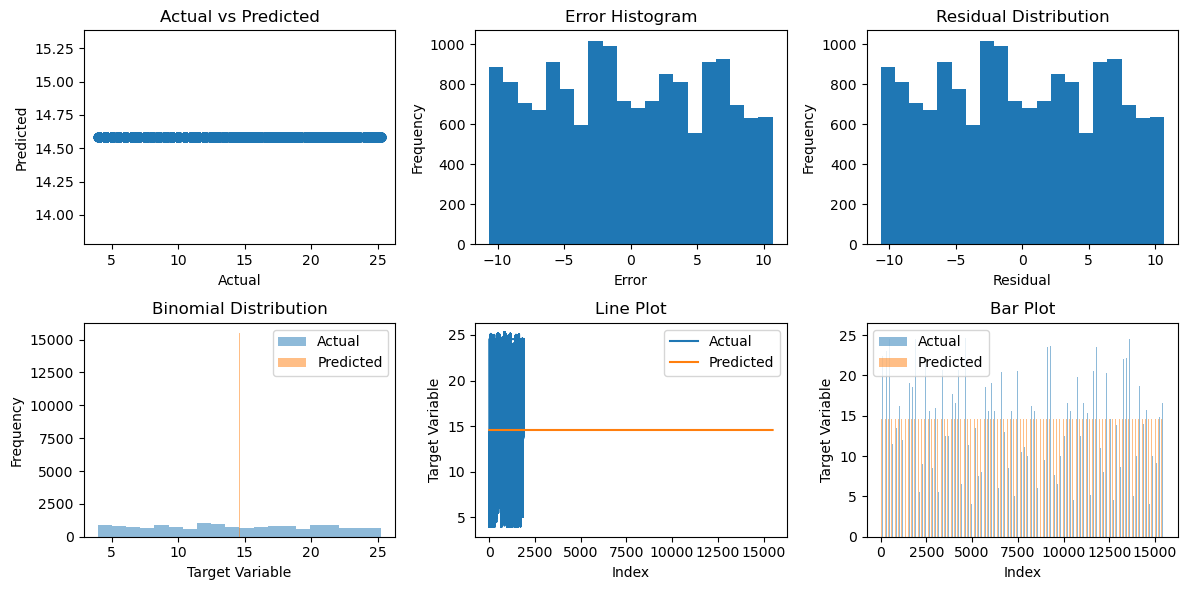

Target Variable: wind_speed_mean
Baseline Model Metrics:
MAE: 5.279254351762419
MSE: 37.142310366524136
RMSE: 6.094449143813092
R2: -0.0008062910402755197



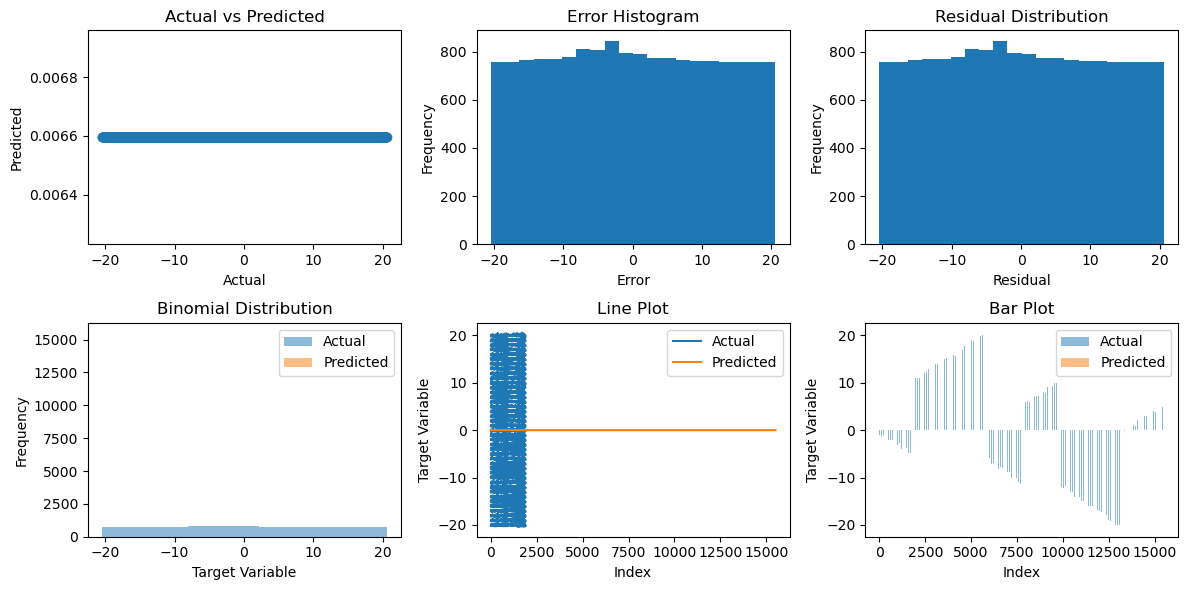

Target Variable: yaw_error_mean
Baseline Model Metrics:
MAE: 10.246529830639101
MSE: 140.01791992917956
RMSE: 11.832916797188238
R2: -1.0966284769153845e-07



C:\Users\musab\AppData\Local\Temp\ipykernel_300\3617667888.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


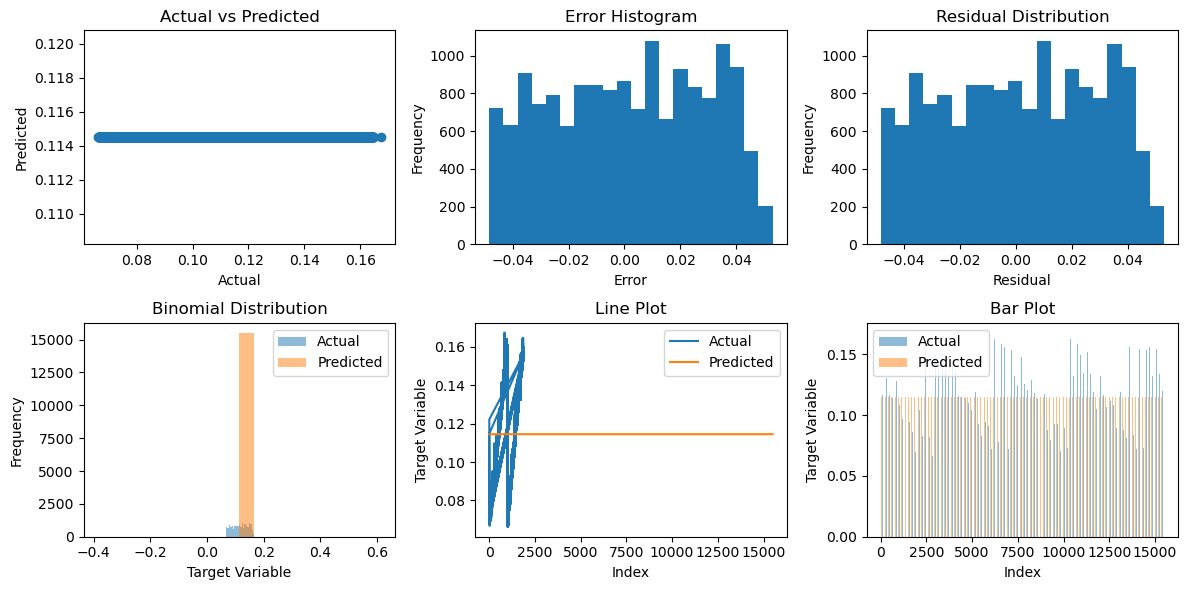

Target Variable: Turbulence
Baseline Model Metrics:
MAE: 0.023586757562791476
MSE: 0.0007494671352317645
RMSE: 0.027376397411488687
R2: -0.0023238814842079236



In [23]:
def create_baseline_model(y_train, y_test):
    baseline_prediction = np.mean(y_train)
    
    y_pred = np.full_like(y_test, baseline_prediction)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')

    plt.subplot(2, 3, 2)
    error = y_test - y_pred
    plt.hist(error, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Histogram')

    plt.subplot(2, 3, 3)
    residual = y_test - y_pred
    plt.hist(residual, bins=20)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')

    plt.subplot(2, 3, 4)
    plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
    plt.hist(y_pred, bins=20, alpha=0.5, label='Predicted')
    plt.xlabel('Target Variable')
    plt.ylabel('Frequency')
    plt.title('Binomial Distribution')
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Target Variable')
    plt.title('Line Plot')
    plt.legend()

    plt.subplot(2, 3, 6)
    index = np.arange(len(y_test))
    plt.bar(index, y_test, width=0.3, alpha=0.5, label='Actual')
    plt.bar(index + 0.3, y_pred, width=0.3, alpha=0.5, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Target Variable')
    plt.title('Bar Plot')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    return mae, mse, rmse, r2

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    mae_baseline, mse_baseline, rmse_baseline, r2_baseline = create_baseline_model(y_train, y_test)
    
    print("Target Variable:", target_variable)
    print("Baseline Model Metrics:")
    print("MAE:", mae_baseline)
    print("MSE:", mse_baseline)
    print("RMSE:", rmse_baseline)
    print("R2:", r2_baseline)
    print()


In [41]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select the top 5 most influential features
top_features = X_train.columns[sorted_indices[:15]]

print("Top 5 Most Influential Features:")
for feature in top_features:
    print(feature)

# Extract the selected features from your dataset
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Apply polynomial feature transformation to the selected features
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Train the CatBoostRegressor model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train_poly, y_train)

# Make predictions on the training and testing data
train_predictions = catboost_model.predict(X_train_poly)
test_predictions = catboost_model.predict(X_test_poly)

# Evaluate the model's performance
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Model Performance:")
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Top 5 Most Influential Features:
acceleration_CROSS_mean
power_median
acceleration_THRUST_mean
acceleration_CROSS_median
acceleration_CROSS_max
acceleration_THRUST_median
acceleration_CROSS_min
acceleration_THRUST_min
rotorposition_std
power_max
acceleration_THRUST_max
rotorposition_max
rotorposition_q1
acceleration_CROSS_std
rotorposition_median
Learning rate set to 0.048964
0:	learn: 11.5700827	total: 570ms	remaining: 9m 29s
1:	learn: 11.4351177	total: 1.02s	remaining: 8m 29s
2:	learn: 11.3067954	total: 1.51s	remaining: 8m 22s
3:	learn: 11.1747754	total: 1.97s	remaining: 8m 10s
4:	learn: 11.0649686	total: 2.49s	remaining: 8m 15s
5:	learn: 10.9598333	total: 2.93s	remaining: 8m 4s
6:	learn: 10.8639640	total: 3.38s	remaining: 7m 59s
7:	learn: 10.7700190	total: 3.87s	remaining: 7m 59s
8:	learn: 10.6761056	total: 4.34s	remaining: 7m 57s
9:	learn: 10.5988918	total: 4.81s	remaining: 7m 56s
10:	learn: 10.5218001	total: 5.27s	remaining: 7m 54s
11:	learn: 10.4434531	total: 5.77s	remaining: 7m 

151:	learn: 7.9848484	total: 1m 6s	remaining: 6m 11s
152:	learn: 7.9696373	total: 1m 7s	remaining: 6m 10s
153:	learn: 7.9648318	total: 1m 7s	remaining: 6m 10s
154:	learn: 7.9553615	total: 1m 7s	remaining: 6m 9s
155:	learn: 7.9446741	total: 1m 8s	remaining: 6m 9s
156:	learn: 7.9374851	total: 1m 8s	remaining: 6m 8s
157:	learn: 7.9266480	total: 1m 9s	remaining: 6m 8s
158:	learn: 7.9164872	total: 1m 9s	remaining: 6m 7s
159:	learn: 7.9037198	total: 1m 9s	remaining: 6m 7s
160:	learn: 7.8949946	total: 1m 10s	remaining: 6m 6s
161:	learn: 7.8857956	total: 1m 10s	remaining: 6m 6s
162:	learn: 7.8801789	total: 1m 11s	remaining: 6m 5s
163:	learn: 7.8700572	total: 1m 11s	remaining: 6m 4s
164:	learn: 7.8668469	total: 1m 12s	remaining: 6m 4s
165:	learn: 7.8595362	total: 1m 12s	remaining: 6m 4s
166:	learn: 7.8523678	total: 1m 12s	remaining: 6m 3s
167:	learn: 7.8431824	total: 1m 13s	remaining: 6m 3s
168:	learn: 7.8296899	total: 1m 13s	remaining: 6m 3s
169:	learn: 7.8196859	total: 1m 14s	remaining: 6m 2s

305:	learn: 6.5620187	total: 2m 10s	remaining: 4m 56s
306:	learn: 6.5521876	total: 2m 11s	remaining: 4m 56s
307:	learn: 6.5476952	total: 2m 11s	remaining: 4m 55s
308:	learn: 6.5416902	total: 2m 12s	remaining: 4m 55s
309:	learn: 6.5303491	total: 2m 12s	remaining: 4m 54s
310:	learn: 6.5245244	total: 2m 12s	remaining: 4m 54s
311:	learn: 6.5131377	total: 2m 13s	remaining: 4m 54s
312:	learn: 6.5015204	total: 2m 13s	remaining: 4m 53s
313:	learn: 6.4931392	total: 2m 14s	remaining: 4m 53s
314:	learn: 6.4849206	total: 2m 14s	remaining: 4m 52s
315:	learn: 6.4781709	total: 2m 15s	remaining: 4m 52s
316:	learn: 6.4690455	total: 2m 15s	remaining: 4m 51s
317:	learn: 6.4590723	total: 2m 15s	remaining: 4m 51s
318:	learn: 6.4510277	total: 2m 16s	remaining: 4m 50s
319:	learn: 6.4428240	total: 2m 16s	remaining: 4m 50s
320:	learn: 6.4325428	total: 2m 17s	remaining: 4m 49s
321:	learn: 6.4193038	total: 2m 17s	remaining: 4m 49s
322:	learn: 6.4115480	total: 2m 17s	remaining: 4m 49s
323:	learn: 6.4022193	total:

458:	learn: 5.4070936	total: 3m 14s	remaining: 3m 48s
459:	learn: 5.4014576	total: 3m 14s	remaining: 3m 48s
460:	learn: 5.3954491	total: 3m 14s	remaining: 3m 47s
461:	learn: 5.3929068	total: 3m 15s	remaining: 3m 47s
462:	learn: 5.3861791	total: 3m 15s	remaining: 3m 47s
463:	learn: 5.3803407	total: 3m 16s	remaining: 3m 46s
464:	learn: 5.3712623	total: 3m 16s	remaining: 3m 46s
465:	learn: 5.3681800	total: 3m 17s	remaining: 3m 45s
466:	learn: 5.3631819	total: 3m 17s	remaining: 3m 45s
467:	learn: 5.3544777	total: 3m 17s	remaining: 3m 44s
468:	learn: 5.3513449	total: 3m 18s	remaining: 3m 44s
469:	learn: 5.3464250	total: 3m 18s	remaining: 3m 43s
470:	learn: 5.3390873	total: 3m 19s	remaining: 3m 43s
471:	learn: 5.3313984	total: 3m 19s	remaining: 3m 43s
472:	learn: 5.3260607	total: 3m 19s	remaining: 3m 42s
473:	learn: 5.3197034	total: 3m 20s	remaining: 3m 42s
474:	learn: 5.3112158	total: 3m 20s	remaining: 3m 41s
475:	learn: 5.3034859	total: 3m 21s	remaining: 3m 41s
476:	learn: 5.2943381	total:

611:	learn: 4.5804023	total: 4m 19s	remaining: 2m 44s
612:	learn: 4.5768654	total: 4m 20s	remaining: 2m 44s
613:	learn: 4.5708816	total: 4m 20s	remaining: 2m 43s
614:	learn: 4.5665651	total: 4m 21s	remaining: 2m 43s
615:	learn: 4.5611290	total: 4m 21s	remaining: 2m 43s
616:	learn: 4.5540398	total: 4m 21s	remaining: 2m 42s
617:	learn: 4.5498333	total: 4m 22s	remaining: 2m 42s
618:	learn: 4.5465728	total: 4m 22s	remaining: 2m 41s
619:	learn: 4.5424825	total: 4m 23s	remaining: 2m 41s
620:	learn: 4.5372115	total: 4m 23s	remaining: 2m 40s
621:	learn: 4.5308783	total: 4m 23s	remaining: 2m 40s
622:	learn: 4.5249825	total: 4m 24s	remaining: 2m 39s
623:	learn: 4.5184955	total: 4m 24s	remaining: 2m 39s
624:	learn: 4.5121576	total: 4m 25s	remaining: 2m 39s
625:	learn: 4.5070345	total: 4m 25s	remaining: 2m 38s
626:	learn: 4.5028610	total: 4m 25s	remaining: 2m 38s
627:	learn: 4.4997931	total: 4m 26s	remaining: 2m 37s
628:	learn: 4.4948479	total: 4m 26s	remaining: 2m 37s
629:	learn: 4.4902326	total:

764:	learn: 3.9170746	total: 5m 23s	remaining: 1m 39s
765:	learn: 3.9136547	total: 5m 23s	remaining: 1m 38s
766:	learn: 3.9094292	total: 5m 24s	remaining: 1m 38s
767:	learn: 3.9058608	total: 5m 24s	remaining: 1m 38s
768:	learn: 3.8970454	total: 5m 24s	remaining: 1m 37s
769:	learn: 3.8922033	total: 5m 25s	remaining: 1m 37s
770:	learn: 3.8858936	total: 5m 25s	remaining: 1m 36s
771:	learn: 3.8841009	total: 5m 26s	remaining: 1m 36s
772:	learn: 3.8802477	total: 5m 26s	remaining: 1m 35s
773:	learn: 3.8759618	total: 5m 26s	remaining: 1m 35s
774:	learn: 3.8737646	total: 5m 27s	remaining: 1m 35s
775:	learn: 3.8684280	total: 5m 27s	remaining: 1m 34s
776:	learn: 3.8655213	total: 5m 28s	remaining: 1m 34s
777:	learn: 3.8607847	total: 5m 28s	remaining: 1m 33s
778:	learn: 3.8581143	total: 5m 28s	remaining: 1m 33s
779:	learn: 3.8534558	total: 5m 29s	remaining: 1m 32s
780:	learn: 3.8509010	total: 5m 29s	remaining: 1m 32s
781:	learn: 3.8439965	total: 5m 30s	remaining: 1m 32s
782:	learn: 3.8398596	total:

919:	learn: 3.3441158	total: 6m 25s	remaining: 33.5s
920:	learn: 3.3397746	total: 6m 26s	remaining: 33.1s
921:	learn: 3.3372924	total: 6m 26s	remaining: 32.7s
922:	learn: 3.3349122	total: 6m 27s	remaining: 32.3s
923:	learn: 3.3327238	total: 6m 27s	remaining: 31.9s
924:	learn: 3.3305575	total: 6m 27s	remaining: 31.4s
925:	learn: 3.3258938	total: 6m 28s	remaining: 31s
926:	learn: 3.3217966	total: 6m 28s	remaining: 30.6s
927:	learn: 3.3198308	total: 6m 29s	remaining: 30.2s
928:	learn: 3.3164532	total: 6m 29s	remaining: 29.8s
929:	learn: 3.3133431	total: 6m 29s	remaining: 29.3s
930:	learn: 3.3102927	total: 6m 30s	remaining: 28.9s
931:	learn: 3.3072295	total: 6m 30s	remaining: 28.5s
932:	learn: 3.3028596	total: 6m 31s	remaining: 28.1s
933:	learn: 3.2996119	total: 6m 31s	remaining: 27.7s
934:	learn: 3.2979506	total: 6m 31s	remaining: 27.2s
935:	learn: 3.2954292	total: 6m 32s	remaining: 26.8s
936:	learn: 3.2942627	total: 6m 32s	remaining: 26.4s
937:	learn: 3.2922924	total: 6m 33s	remaining: 2